In [1]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
n = 1000
half_life = 3.052 * 60 #  seconds

def plot(evolution):
    plt.plot(evolution[0], evolution[1], label = 'decayed')
    plt.plot(evolution[0], n - evolution[1], label = 'Tl sample')
    plt.grid()
    plt.legend()
    plt.xlabel('time (s)')
    plt.ylabel('atoms')
    plt.show()

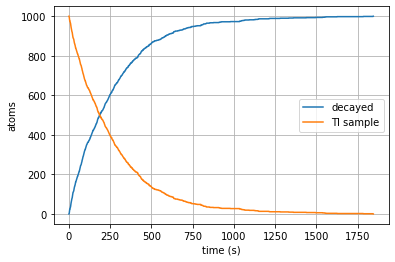

In [3]:
# method 1
t = 0
decayed_atoms = 0
evolution = [[t, decayed_atoms]]
while decayed_atoms < n:
    t += 1
    p = 1 - np.power(2, - 1 / half_life)
    non_decayed_atoms = n - decayed_atoms
    decay_probs = npr.rand(non_decayed_atoms)
    decayed = len(decay_probs[decay_probs < p])
    decayed_atoms += decayed
    evolution.append([t, decayed_atoms])
evolution = np.array(evolution).T
plot(evolution)

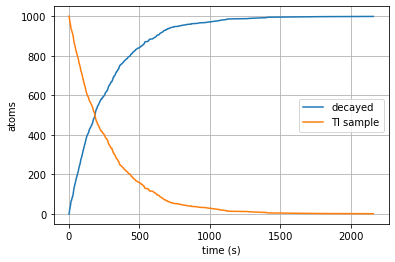

In [4]:
# method 2
# mu = ln 2 / tau => t(z) = - tau * log(1-z) / ln(2), u(z) uniform distribution

z = npr.rand(1000)
mu = np.log(2) / half_life
t = - np.log(1 - z) / mu
t.sort()
decayed_atoms = np.arange(0, 1000, 1)
plot([t, decayed_atoms])

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

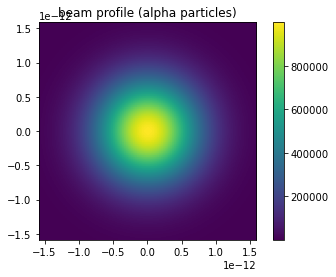

answer = 1517


In [5]:
# constants
Z = 79
e = 1.602e-19
E = 7.7e6 * e
epsilon_0 = 8.854e-12
a_0 = 5.292e-11
sigma = a_0 / 100
N = 10**6

def gaussian(x, y, sigma, A, x0=0, y0=0):
    return A * np.exp(-0.5 * ((x - x0) ** 2 + (y - y0) ** 2) / sigma ** 2)

# plotting beam profile
x_min, x_max, y_min, y_max = -3 * sigma, 3 * sigma, -3 * sigma, 3 * sigma
x = np.linspace(x_min, x_max, 100)
y = np.linspace(y_min, y_max, 100)

X, Y = np.meshgrid(x, y)
particle_density = gaussian(X, Y, sigma, N)

plt.imshow(particle_density, extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.title(r"beam profile (alpha particles)")
plt.show()

# computing the fraction of particles that bounce back
z = npr.rand(N)
r = np.sqrt(- 2 * sigma ** 2 * np.log(1 - z))
theta = 2 * np.arctan(Z * e ** 2/ (2 * np.pi * epsilon_0 * E * r)) 
print('answer =', len(theta[theta > np.pi / 2]))

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [6]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

abs_val = 1.4514014855

# hit and miss
N = 1000000
count = 0
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    if y < f(x): count += 1
I = 2 * count / N
error = np.abs(I - abs_val)
print('hit-miss error =', error)

# mean value method
I = 0
x = np.linspace(0.001, 1.999, N)
h = x[1] - x[0]
for x_ in x:
    I += h * f(x_) 
error = np.abs(I - abs_val)
print('mean value method error =', error)

hit-miss error = 0.0010845145000000223
mean value method error = 0.0009997374467718423


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



The area of the circle is 3.144364


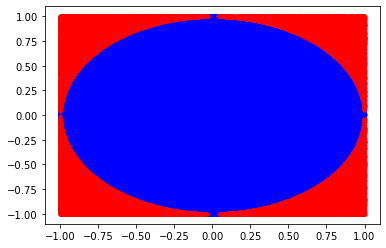

In [7]:
# number of random points
N = 1000000

# generate random points
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# compute the distance from the origin
r = np.sqrt(x ** 2 + y ** 2)

# count the number of points inside the circle
n = np.sum(r < 1)

# compute the area of the circle
area = 4 * n / N

# print the result
print("The area of the circle is", area)

# plot the points
plt.plot(x[r < 1], y[r < 1], 'b.')
plt.plot(x[r > 1], y[r > 1], 'r.')
plt.show()

In [8]:
N = 1000000
x = np.random.rand(N, 10)
x = 2 * x - 1
volume = (2 ** 10) * np.sum(np.sum(x ** 2, axis = 1) <= 1) / N
print('The volume of the 10D sphere =',volume)

The volume of the 10D sphere = 2.646016


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [9]:
N = 100000
def f(x):
    return (x ** -0.5) / (np.exp(x) + 1)
def w(x):
    return 1 / np.sqrt(x)

z = npr.random(N)
x_ = z ** 2

I = (1/N) * np.sum([f(x)/w(x) for x in x_]) * 2
print(I)

0.8396113128759313
